In [21]:
import onnxruntime as rt
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
from skimage.transform import resize


In [64]:
sess = rt.InferenceSession("pilotNet.onnx")

(256, 256, 3)


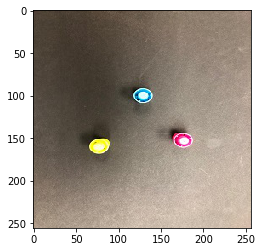

In [115]:
img = io.imread('7.jpg');

#imgTest = imresize(img,1)
print(img.shape)
plt.imshow(img)

In [111]:
# PROCESS THE DATA
np_img = np.array(img)
print("X train start shape", np_img.shape)

X train start shape (256, 256, 3)


In [113]:
print(sess.run.__doc__)


        Compute the predictions.

        :param output_names: name of the outputs
        :param input_feed: dictionary ``{ input_name: input_value }``
        :param run_options: See :class:`onnxruntime.RunOptions`.

        ::

            sess.run([output_name], {input_name: x})
        


In [114]:
input_name = sess.get_inputs()[0].name
output_name = sess.get_outputs()[0].name

# Helpful errors msgs
http://www.xavierdupre.fr/app/onnxruntime/helpsphinx/auto_examples/plot_common_errors.html

In [94]:
print(input_name)
print(output_name)

ImageInputLayer
Softmax_Layer_Transpose2


In [112]:
#pred_onx = sess.run([0,1,2],{input:img})
output_label = ["0","1","2","4"]
output_label_2 = "output"

print(type(feed_dict))
pred_onx = sess.run(output_label, {input_name:np_img})

<class 'dict'>


InvalidArgument: [ONNXRuntimeError] : 2 : INVALID_ARGUMENT : Unexpected input data type. Actual: (class onnxruntime::PrimitiveDataType<unsigned char>) , expected: (class onnxruntime::PrimitiveDataType<float>)